In [5]:
# IMDb Top 1000 Movies Analysis
# Script criado para análise e visualizações de dados do dataset de filmes mais bem avaliados no IMDb

import pandas as pd
import matplotlib.pyplot as plt

# Carregando o dataset
data_path = '/Users/tiagosilva/Desktop/Data Analyst /Movie Project/imdb_top_1000.csv'  
imdb_data = pd.read_csv(data_path)

In [25]:
imdb_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [9]:
# Limpeza e Preparação dos Dados
imdb_data['Runtime'] = imdb_data['Runtime'].str.replace(' min', '').astype(float)
imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '').astype(float)

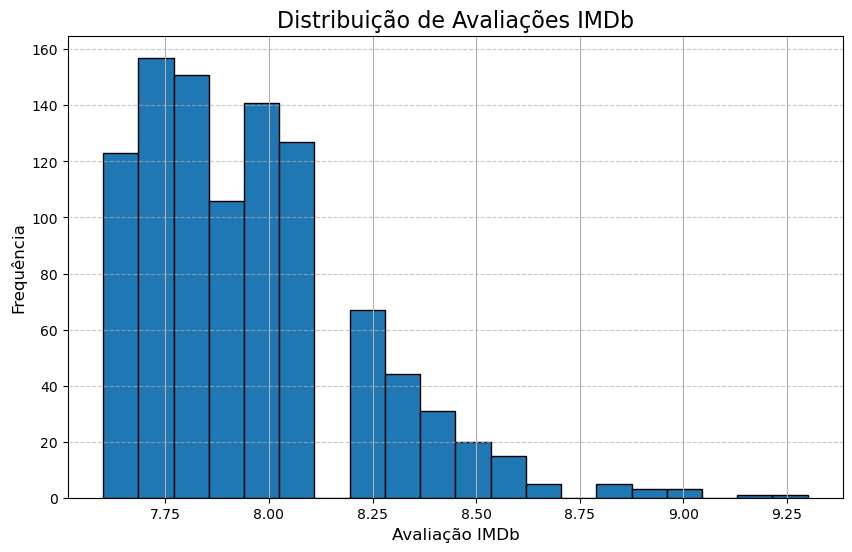

In [11]:
# 1. Distribuição de Avaliações IMDb
plt.figure(figsize=(10, 6))
imdb_data['IMDB_Rating'].hist(bins=20, edgecolor='black')
plt.title('Distribuição de Avaliações IMDb', fontsize=16)
plt.xlabel('Avaliação IMDb', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

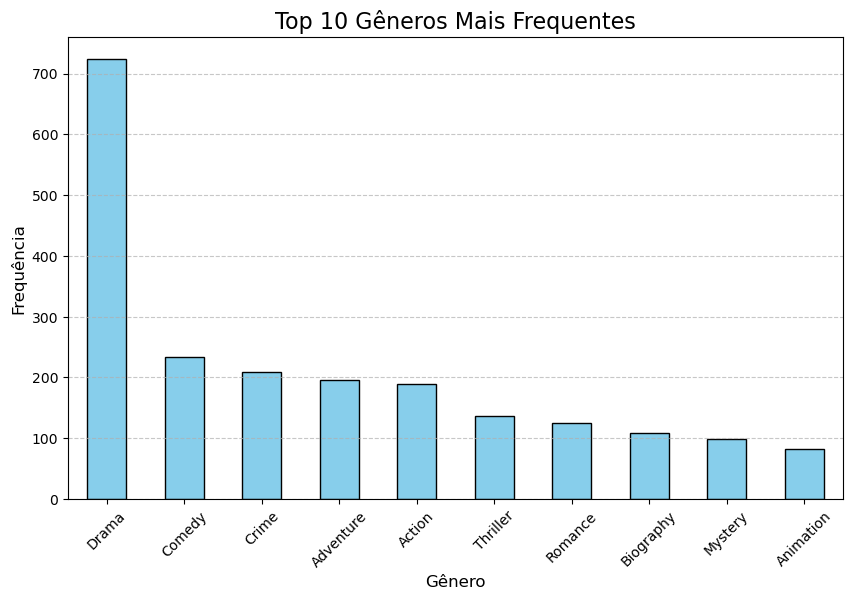

In [13]:
# 2. Top 10 Gêneros Mais Frequentes
genres = imdb_data['Genre'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
genres.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Gêneros Mais Frequentes', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# 3. Top 10 Filmes Mais Votados
top_voted = imdb_data.nlargest(10, 'No_of_Votes')[['Series_Title', 'No_of_Votes']]
print("Top 10 Filmes Mais Votados:")
print(top_voted)

Top 10 Filmes Mais Votados:
                                         Series_Title  No_of_Votes
0                            The Shawshank Redemption      2343110
2                                     The Dark Knight      2303232
8                                           Inception      2067042
9                                          Fight Club      1854740
6                                        Pulp Fiction      1826188
11                                       Forrest Gump      1809221
14                                         The Matrix      1676426
10  The Lord of the Rings: The Fellowship of the Ring      1661481
5       The Lord of the Rings: The Return of the King      1642758
1                                       The Godfather      1620367


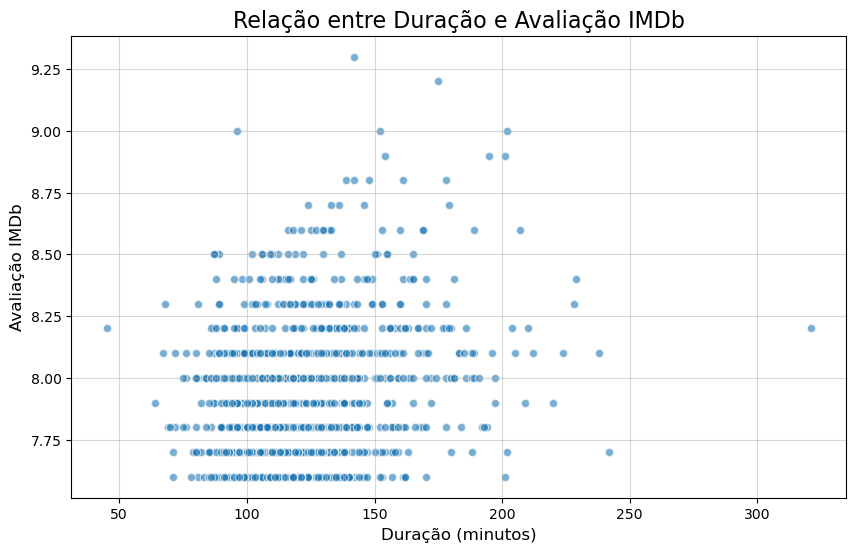

In [17]:
# 4. Relação entre Duração e Avaliação IMDb
plt.figure(figsize=(10, 6))
plt.scatter(imdb_data['Runtime'], imdb_data['IMDB_Rating'], alpha=0.6, edgecolors='w')
plt.title('Relação entre Duração e Avaliação IMDb', fontsize=16)
plt.xlabel('Duração (minutos)', fontsize=12)
plt.ylabel('Avaliação IMDb', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

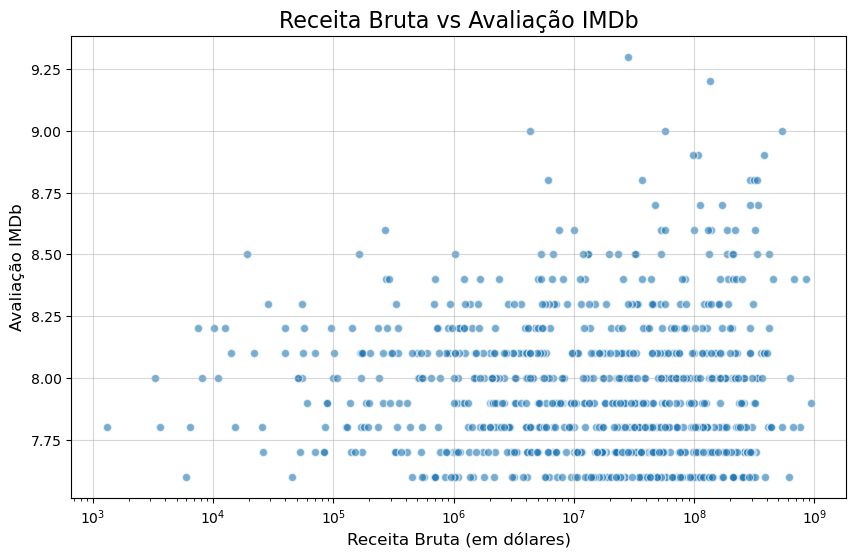

In [19]:
# 5. Receita Bruta vs Avaliação IMDb
plt.figure(figsize=(10, 6))
plt.scatter(imdb_data['Gross'], imdb_data['IMDB_Rating'], alpha=0.6, edgecolors='w')
plt.title('Receita Bruta vs Avaliação IMDb', fontsize=16)
plt.xlabel('Receita Bruta (em dólares)', fontsize=12)
plt.ylabel('Avaliação IMDb', fontsize=12)
plt.xscale('log')  # Escala logarítmica para lidar com valores grandes
plt.grid(alpha=0.5)
plt.show()

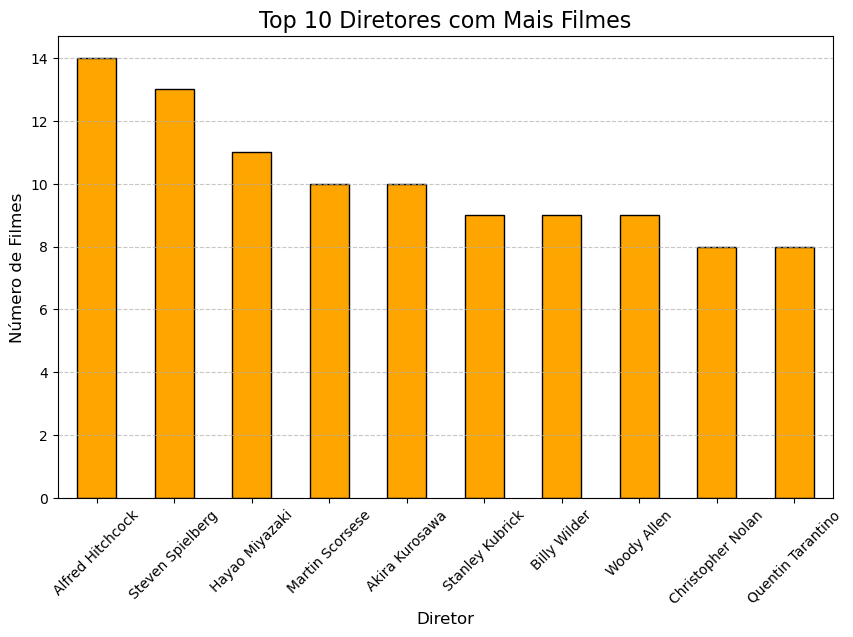

In [21]:
# 6. Top 10 Diretores com Mais Filmes
top_directors = imdb_data['Director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Diretores com Mais Filmes', fontsize=16)
plt.xlabel('Diretor', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()